In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.ticker import ScalarFormatter
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import xgboost as xgb
from scipy.stats import pearsonr, bartlett, levene, wilcoxon, mannwhitneyu, ttest_ind, f_oneway, kruskal
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera
import pingouin as pg
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import shap
from sklearn.model_selection import StratifiedKFold

In [2]:
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv('C:/Users/Home/Desktop/Data/2차/df2.csv', encoding = 'utf-8')

In [4]:
df2 = df.copy()

In [5]:
df2['고객구분_New'] = '임시'
df2.loc[df2['RFM_Class'].isin(['VIP고객', '충성고객', '잠재VIP고객']), '고객구분_New'] = '연속'
df2.loc[df2['RFM_Class'].isin(['잠재충성고객', '놓치면안될고객']), '고객구분_New'] = '간헐'
df2.loc[df2['RFM_Class'].isin(['관심필요고객', '이탈우려고객', '겨울잠고객']), '고객구분_New'] = '휴면'

In [6]:
df2['고객구분_New'].value_counts()

휴면    119357
연속    111254
간헐     69389
Name: 고객구분_New, dtype: int64

# 로지스틱

In [18]:
df3 = df2[df2['고객구분_New'] != '간헐']

In [19]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df3[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_신용_R12M',
       '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
       '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_신용_R3M',
       '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '이용금액_쇼핑', '쇼핑_전체_이용금액',
       '청구금액_R3M', '청구금액_R6M', 'Monetary']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
logreg_model = LogisticRegression()

# 모델 학습
logreg_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = logreg_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.604470654554127
Confusion Matrix:
 [[22390    36]
 [18207  5490]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.55      1.00      0.71     22426
          휴면       0.99      0.23      0.38     23697

    accuracy                           0.60     46123
   macro avg       0.77      0.62      0.54     46123
weighted avg       0.78      0.60      0.54     46123



,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,이용금액_신용_R12M,이용금액_신판_R12M,이용금액_일시불_R12M,이용금액_할부_R12M,이용금액_체크_R12M,이용금액_신용_R6M,이용금액_신판_R6M,이용금액_일시불_R6M,이용금액_신용_R3M,이용금액_신판_R3M,이용금액_일시불_R3M,이용금액_업종기준,이용금액_쇼핑,쇼핑_전체_이용금액,청구금액_R3M,청구금액_R6M,Monetary
6,839450,839450,839450,5227400,5227400,4840980,386420,0,2874800,2874800,2488380,839450,839450,839450,939450,443930,443930,1048465,2777740,6166850
9,2461105,2461105,2461105,13372657,4172657,1974357,2198300,0,8488157,4088157,1889857,3461105,2461105,1348305,2481405,1551063,1551063,1674357,3349533,15854062
11,745370,598150,598150,4853249,4853249,4853249,0,147220,1327160,1327160,1327160,598150,598150,598150,598150,74650,74650,581520,1734588,5598619
16,995835,995835,995835,3988649,3988649,3988649,0,0,2055239,2055239,2055239,995835,995835,995835,1034835,837095,837095,1005394,1973445,5023484
25,104870,104870,104870,1694880,1694880,1694880,0,0,977300,977300,977300,104870,104870,104870,104870,11480,11480,229470,1241900,1799750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299982,602130,602130,602130,4636960,4636960,2356960,2280000,0,1401150,1401150,1401150,602130,602130,602130,607300,301580,301580,1577200,2597898,5244260
299983,1271120,1190020,595010,4453697,4453697,4249697,204000,1351640,926630,926630,926630,595010,595010,595010,595010,121800,121800,472980,811630,6400347
299986,2657274,2657274,2657274,11450124,11450124,4299460,7150664,0,5093304,5093304,1522140,2657274,2657274,717190,2657274,1011810,1011810,2332406,4505624,14107398
299996,600,600,600,5934610,5534610,3817210,1717400,0,1175000,775000,775000,600,600,600,600,0,0,220817,2744594,5935210


In [21]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [22]:
df4 = df4[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_신용_R12M',
       '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
       '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_신용_R3M',
       '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '이용금액_쇼핑', '쇼핑_전체_이용금액',
       '청구금액_R3M', '청구금액_R6M', 'Monetary','RFM_Class']]

In [23]:
X1 = df4[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_신용_R12M',
       '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
       '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_신용_R3M',
       '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '이용금액_쇼핑', '쇼핑_전체_이용금액',
       '청구금액_R3M', '청구금액_R6M', 'Monetary']]

In [19]:
df4['first_step_prediction'] = logreg_model.predict(X1)

In [20]:
df4['first_step_prediction'].value_counts()

연속    68441
휴면      948
Name: first_step_prediction, dtype: int64

## 랜덤포레스트

In [8]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df2.select_dtypes(include=['number'])
y = df2['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
RF_model = RandomForestClassifier()

# 모델 학습
RF_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999333333333333
Confusion Matrix:
 [[13874     1     0]
 [    0 22395     0]
 [    3     0 23727]]
Classification Report:
               precision    recall  f1-score   support

          간헐       1.00      1.00      1.00     13875
          연속       1.00      1.00      1.00     22395
          휴면       1.00      1.00      1.00     23730

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



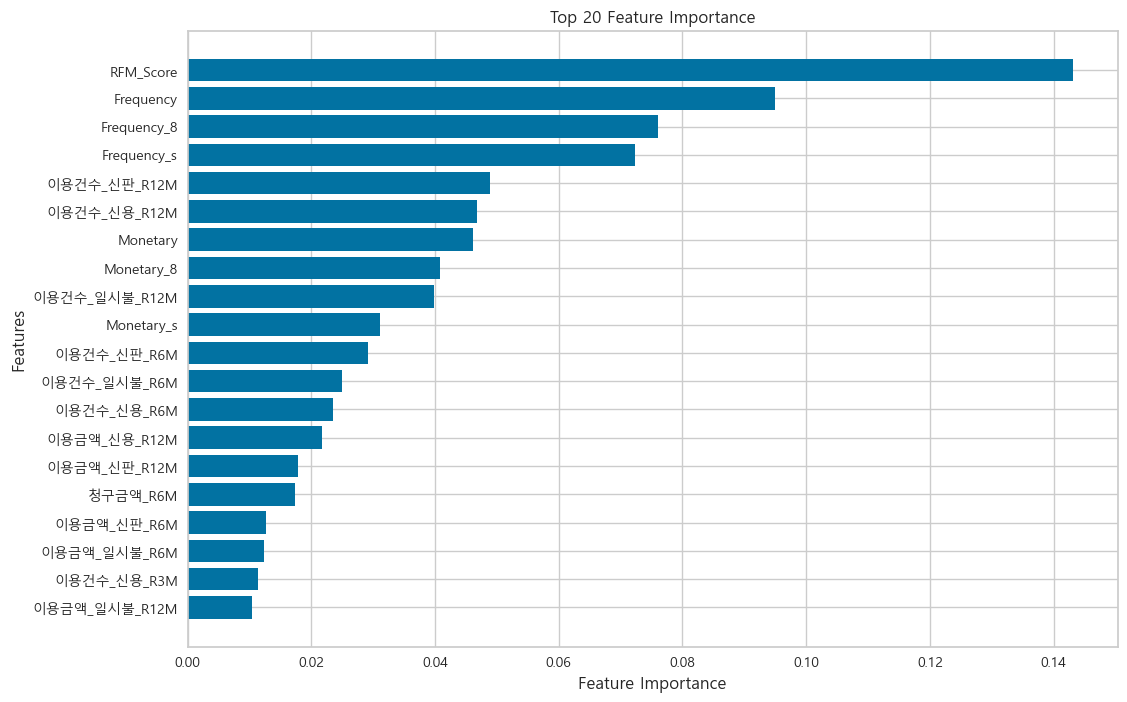

In [17]:
# feature importance 추출
importance = RF_model.feature_importances_

# 각 특성의 이름 (예제에서는 'Feature 1', 'Feature 2', 등)
feature_names = X.columns

# feature importance를 내림차순으로 정렬한 후, 상위 20개만 선택
top_20_indices = importance.argsort()[::-1][:20]
top_20_importance = importance[top_20_indices]
top_20_feature_names = feature_names[top_20_indices]

# 시각화
plt.figure(figsize=(12, 8))
plt.barh(top_20_feature_names, top_20_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # 특성 이름을 역순으로 표시
plt.show()

In [23]:
df3 = df2[df2['고객구분_New'] != '간헐']

In [25]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df3[['이용건수_신판_R12M', '이용금액_신판_R12M', '청구금액_R6M']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
RF_model = RandomForestClassifier()

# 모델 학습
RF_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9753051622834594
Confusion Matrix:
 [[21369  1057]
 [   82 23615]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.95      0.97     22426
          휴면       0.96      1.00      0.98     23697

    accuracy                           0.98     46123
   macro avg       0.98      0.97      0.98     46123
weighted avg       0.98      0.98      0.98     46123



In [32]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [33]:
df4 = df4[['이용건수_신판_R12M', '이용금액_신판_R12M', '청구금액_R6M','고객구분_New']]

In [34]:
X1 = df4[['이용건수_신판_R12M', '이용금액_신판_R12M', '청구금액_R6M']]

In [35]:
df4['prediction'] = RF_model.predict(X1)

In [36]:
df4['prediction'].value_counts()

연속    54947
휴면    14442
Name: prediction, dtype: int64

In [39]:
result_df = df2[df2['고객구분_New'] == '간헐'].merge(df4[['prediction']], left_index=True, right_index=True)

In [45]:
result_df.to_csv('result_df.csv', encoding='utf-8', index=False)

In [46]:
result_df

,Unnamed: 0,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,...,Frequency_s,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score,RFM_Class,고객구분_New,prediction
6,6,w8NeFjRo,2,38,1,20170609,19,1,0,0,...,0.025141,0.001804,1,8,5,4,61.056236,잠재충성고객,간헐,연속
9,9,OdlqFy2F,2,42,1,20100816,101,0,0,0,...,0.017980,0.003194,1,8,4,7,64.671510,잠재충성고객,간헐,연속
11,11,PjmGznTm,1,45,1,19950524,284,0,0,1,...,0.026665,0.001722,1,8,5,4,61.056236,잠재충성고객,간헐,연속
16,16,Os3UUS88,1,80,1,20171128,14,0,0,0,...,0.032759,0.001639,1,8,5,4,61.056236,잠재충성고객,간헐,연속
25,25,CRX23tPQ,1,34,1,20170921,16,1,0,0,...,0.025598,0.001177,1,8,5,3,57.226267,놓치면안될고객,간헐,연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299982,299982,g7KF9R6g,1,56,1,20150903,40,1,0,0,...,0.027579,0.001671,1,8,5,4,61.056236,잠재충성고객,간헐,연속
299983,299983,Tp3muDcV,1,55,1,20160219,35,0,0,0,...,0.035654,0.001837,1,8,5,5,64.886204,잠재충성고객,간헐,연속
299986,299986,4n8aFEwI,1,45,1,20071017,135,0,0,1,...,0.037635,0.002943,1,8,5,6,68.716172,잠재충성고객,간헐,연속
299996,299996,EDQYlTTX,2,69,1,20150417,45,0,0,0,...,0.021332,0.001770,1,8,4,4,53.181605,놓치면안될고객,간헐,연속


In [9]:
df['이용건수_신판_R12M'].value_counts().sort_index()

-25      1
-22      1
-21      1
-6       3
-4       1
        ..
 3697    1
 3942    1
 4220    1
 4254    1
 6541    1
Name: 이용건수_신판_R12M, Length: 2068, dtype: int64

## permutation -> 시간 너무 오래걸림

In [12]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df2.select_dtypes(include=['number'])
y = df2['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

## SelectKBest

In [68]:
df3 = df2[df2['고객구분_New'] != '간헐']

In [ ]:
X[X < 0] = 0

In [51]:
X = df3.select_dtypes(include=['number'])

In [52]:
k_best = SelectKBest(score_func=chi2, k=30)

X_new = k_best.fit_transform(X, y)

scores = k_best.scores_
pvalues = k_best.pvalues_
selected_features = k_best.get_support(indices=True)

In [53]:
# 선택된 특성 확인 (순위가 높은 순서대로)
print("Selected Features:", selected_features)

# 원본 데이터프레임으로부터 선택된 특성 확인
selected_feature_names = X.columns[selected_features]
print("Selected Feature Names:", selected_feature_names)

# 선택된 특성만으로 이루어진 데이터프레임 생성
df_selected = X[selected_feature_names]
print("Selected Features DataFrame:")
print(df_selected.head())

Selected Features: [ 19  20  23  26  37  38  39  67  68  69  70  72  74  75  96  97  98  99
 104 126 127 128 147 148 166 206 216 217 218 294]
Selected Feature Names: Index(['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '카드이용한도금액', '이용금액_신용_B0M',
       '이용금액_신판_B0M', '이용금액_일시불_B0M', '이용금액_신용_R12M', '이용금액_신판_R12M',
       '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_할부_무이자_R12M', '이용금액_CA_R12M',
       '이용금액_체크_R12M', '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M',
       '이용금액_할부_R6M', '이용금액_체크_R6M', '이용금액_신용_R3M', '이용금액_신판_R3M',
       '이용금액_일시불_R3M', '이용금액_업종기준', '이용금액_쇼핑', '쇼핑_전체_이용금액', '이용금액_페이_온라인_R6M',
       '청구금액_B0', '청구금액_R3M', '청구금액_R6M', 'Monetary'],
      dtype='object')
Selected Features DataFrame:
   이용금액_R3M_신용체크  이용금액_R3M_신용  _1순위카드이용금액  카드이용한도금액  이용금액_신용_B0M  이용금액_신판_B0M  \
0         101340       101340      101340   1000000        36950        36950   
1         165810       165810      165810   1000000        55270        55270   
2         184790       184790      184790  

### 20개 특성

In [84]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
# X = df2.select_dtypes(include=['number'])
X = df3[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_신용_R12M',
       '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
       '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_신용_R3M',
       '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '이용금액_쇼핑', '쇼핑_전체_이용금액',
       '청구금액_R3M', '청구금액_R6M', 'Monetary']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9779069011122433
Confusion Matrix:
 [[21868   558]
 [  461 23236]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.98      0.98      0.98     22426
          휴면       0.98      0.98      0.98     23697

    accuracy                           0.98     46123
   macro avg       0.98      0.98      0.98     46123
weighted avg       0.98      0.98      0.98     46123



### 10개 특성

In [25]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
# X = df2.select_dtypes(include=['number'])
X = df3[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_신용_R12M', '이용금액_신판_R12M',
       '이용금액_일시불_R12M', '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M',
       '청구금액_R6M', 'Monetary']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9712724670988444
Confusion Matrix:
 [[21713   713]
 [  612 23085]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.97      0.97      0.97     22426
          휴면       0.97      0.97      0.97     23697

    accuracy                           0.97     46123
   macro avg       0.97      0.97      0.97     46123
weighted avg       0.97      0.97      0.97     46123



### 15개 특성

In [36]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
# X = df2.select_dtypes(include=['number'])
X = df3[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_신용_R12M', '이용금액_신판_R12M',
       '이용금액_일시불_R12M', '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M',
       '이용금액_신용_R3M', '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '청구금액_R3M',
       '청구금액_R6M', 'Monetary']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9720746699043861
Confusion Matrix:
 [[21726   700]
 [  588 23109]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.97      0.97      0.97     22426
          휴면       0.97      0.98      0.97     23697

    accuracy                           0.97     46123
   macro avg       0.97      0.97      0.97     46123
weighted avg       0.97      0.97      0.97     46123



### 18개 특성

In [42]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
# X = df2.select_dtypes(include=['number'])
X = df3[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_신용_R12M',
       '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
       '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_신용_R3M',
       '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '청구금액_R3M', '청구금액_R6M',
       'Monetary']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9740042928690675
Confusion Matrix:
 [[21794   632]
 [  567 23130]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.97      0.97      0.97     22426
          휴면       0.97      0.98      0.97     23697

    accuracy                           0.97     46123
   macro avg       0.97      0.97      0.97     46123
weighted avg       0.97      0.97      0.97     46123



### 19개 특성

In [48]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
# X = df2.select_dtypes(include=['number'])
X = df3[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_신용_R12M',
       '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
       '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_신용_R3M',
       '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '쇼핑_전체_이용금액', '청구금액_R3M',
       '청구금액_R6M', 'Monetary']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9777551330138976
Confusion Matrix:
 [[21852   574]
 [  452 23245]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.98      0.97      0.98     22426
          휴면       0.98      0.98      0.98     23697

    accuracy                           0.98     46123
   macro avg       0.98      0.98      0.98     46123
weighted avg       0.98      0.98      0.98     46123



### 30개 특성

In [54]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
# X = df2.select_dtypes(include=['number'])
X = df3[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '카드이용한도금액', '이용금액_신용_B0M',
       '이용금액_신판_B0M', '이용금액_일시불_B0M', '이용금액_신용_R12M', '이용금액_신판_R12M',
       '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_할부_무이자_R12M', '이용금액_CA_R12M',
       '이용금액_체크_R12M', '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M',
       '이용금액_할부_R6M', '이용금액_체크_R6M', '이용금액_신용_R3M', '이용금액_신판_R3M',
       '이용금액_일시불_R3M', '이용금액_업종기준', '이용금액_쇼핑', '쇼핑_전체_이용금액', '이용금액_페이_온라인_R6M',
       '청구금액_B0', '청구금액_R3M', '청구금액_R6M', 'Monetary']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9787741473885047
Confusion Matrix:
 [[21878   548]
 [  431 23266]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.98      0.98      0.98     22426
          휴면       0.98      0.98      0.98     23697

    accuracy                           0.98     46123
   macro avg       0.98      0.98      0.98     46123
weighted avg       0.98      0.98      0.98     46123



In [86]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [87]:
df4 = df4[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_신용_R12M',
       '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
       '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_신용_R3M',
       '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '이용금액_쇼핑', '쇼핑_전체_이용금액',
       '청구금액_R3M', '청구금액_R6M', 'Monetary','RFM_Class']]

In [88]:
X1 = df4[['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_신용_R12M',
       '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
       '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_신용_R3M',
       '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_업종기준', '이용금액_쇼핑', '쇼핑_전체_이용금액',
       '청구금액_R3M', '청구금액_R6M', 'Monetary']]

In [89]:
df4['first_step_prediction'] = RF_model.predict(X1)

In [90]:
df4['first_step_prediction'].value_counts()

연속    42949
휴면    26440
Name: first_step_prediction, dtype: int64

## 상관관계

In [134]:
mapping_rule = {'연속': 0, '간헐': 1, '휴면': 2}

df2['고객구분_New_le'] = df2['고객구분_New'].map(mapping_rule)

print(df2['고객구분_New_le'].value_counts())

2    119357
0    111254
1     69389
Name: 고객구분_New_le, dtype: int64


In [136]:
corr_matrix = df2.corr()

high_corr_col = corr_matrix[corr_matrix['고객구분_New_le'].abs() >= 0.5].index.tolist()
high_corr_col

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


['_1순위카드이용건수',
 '이용건수_신용_B0M',
 '이용건수_신판_B0M',
 '이용건수_일시불_B0M',
 '이용건수_신용_R12M',
 '이용건수_신판_R12M',
 '이용건수_일시불_R12M',
 '이용개월수_신용_R12M',
 '이용개월수_신판_R12M',
 '이용개월수_일시불_R12M',
 '이용건수_신용_R6M',
 '이용건수_신판_R6M',
 '이용건수_일시불_R6M',
 '이용개월수_신용_R6M',
 '이용개월수_신판_R6M',
 '이용개월수_일시불_R6M',
 '이용건수_신용_R3M',
 '이용건수_신판_R3M',
 '이용건수_일시불_R3M',
 '이용가맹점수',
 '이용개월수_온라인_R6M',
 '이용개월수_오프라인_R6M',
 '이용건수_오프라인_R6M',
 '이용건수_오프라인_B0M',
 '이용개월수_페이_온라인_R6M',
 '이용개월수_간편결제_R6M',
 '이용개월수_전체_R6M',
 '이용개월수_전체_R3M',
 '상환개월수_R12M',
 'Frequency',
 'Frequency_s',
 'Frequency_8',
 'Monetary_8',
 'RFM_Score',
 '고객구분_New_le']

## 상관관계랑 SelectKBest에서 겹치는게 하나도 없네

In [115]:
df2 = df2.drop('고객구분_New_le', axis = 1)

# 재귀적 특성제거

## 시간 투머치

In [120]:
from sklearn.feature_selection import RFE
X = df2.drop('고객구분_New', axis=1)
X = df2.select_dtypes(include=['number'])
y = df2['고객구분_New']

In [121]:
rfe = RFE(estimator=RF_model, n_features_to_select=20)
rfe.fit(X, y)

# 선택된 특성의 인덱스 확인
selected_feature_indices = rfe.support_

# 선택된 특성 확인
selected_features = X.columns[selected_feature_indices]

# 선택된 특성 출력
print("Selected Features:")
print(selected_features)

KeyboardInterrupt: 

# 트리기반

In [127]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df2.select_dtypes(include=['number'])
y = df2['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [128]:
# 특성 중요도 가져오기
feature_importance = RF_model.feature_importances_

# 중요도가 높은 순서대로 특성의 인덱스 정렬
sorted_idx = feature_importance.argsort()[::-1]

# 선택할 특성 개수 설정
num_selected_features = 20

# 중요도가 높은 순서대로 상위 특성 선택
selected_features = X.columns[sorted_idx[:num_selected_features]]

# 선택된 특성 출력
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['RFM_Score', 'Frequency_8', 'Frequency_s', 'Frequency', '이용건수_신판_R12M',
       'Monetary', '이용건수_신용_R12M', 'Monetary_s', 'Monetary_8', '이용건수_일시불_R12M',
       '이용건수_신판_R6M', '이용금액_신판_R12M', '이용건수_신용_R6M', '이용금액_신판_R6M',
       '이용금액_일시불_R12M', '이용건수_신판_R3M', '이용건수_신용_R3M', '이용금액_신용_R12M',
       '이용건수_일시불_R6M', '이용건수_오프라인_R6M'],
      dtype='object')


# 최종

In [ ]:
'이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
'이용개월수_신판_R12M', '이용가맹점수', '상환개월수_R12M',
'이용금액_R3M_신용체크', '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준'

In [137]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
# X = df2.select_dtypes(include=['number'])
X = df3[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

# 정확도 훅 빠지는 컬럼 '이용금액_R3M_신용체크'

RandomForestClassifier()

In [138]:
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9777334518569911
Confusion Matrix:
 [[21442   984]
 [   43 23654]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.96      0.98     22426
          휴면       0.96      1.00      0.98     23697

    accuracy                           0.98     46123
   macro avg       0.98      0.98      0.98     46123
weighted avg       0.98      0.98      0.98     46123



In [153]:
df4 = df2[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준','고객구분_New']]

In [154]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [155]:
X1 = df4[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준']]

In [156]:
df4['prediction'] = RF_model.predict(X1)

C:\Users\Home\AppData\Local\Temp\ipykernel_24892\941989304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['prediction'] = RF_model.predict(X1)


In [157]:
df4['prediction'].value_counts()

연속    56491
휴면    12898
Name: prediction, dtype: int64

## 로지스틱

In [158]:
df3 = df2[df2['고객구분_New'] != '간헐']

In [159]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df3[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
logreg_model = LogisticRegression()

# 모델 학습
logreg_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = logreg_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.843331960193396
Confusion Matrix:
 [[20602  1824]
 [ 5402 18295]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.79      0.92      0.85     22426
          휴면       0.91      0.77      0.84     23697

    accuracy                           0.84     46123
   macro avg       0.85      0.85      0.84     46123
weighted avg       0.85      0.84      0.84     46123



In [162]:
df4 = df2[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준','고객구분_New']]

In [163]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [164]:
X1 = df4[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준']]

In [165]:
df4['first_step_prediction'] = logreg_model.predict(X1)

C:\Users\Home\AppData\Local\Temp\ipykernel_24892\661730130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['first_step_prediction'] = logreg_model.predict(X1)


In [166]:
df4['first_step_prediction'].value_counts()

연속    51908
휴면    17481
Name: first_step_prediction, dtype: int64

## XGBoost

In [208]:
df3 = df2[df2['고객구분_New'] != '간헐']

In [209]:
df3['고객구분_xgb'] = df2['고객구분_New'].replace({'연속': 1,'휴면':0})

C:\Users\Home\AppData\Local\Temp\ipykernel_24892\2562970118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['고객구분_xgb'] = df2['고객구분_New'].replace({'연속': 1,'휴면':0})


In [210]:
df3['고객구분_xgb'].value_counts()

0    119357
1    111254
Name: 고객구분_xgb, dtype: int64

In [214]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df3[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준']]
y = df3['고객구분_xgb']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정
#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성
xgb_model = xgb.XGBClassifier()

# 모델 학습
xgb_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = xgb_model.predict(X_test)

# 모델 성능 평가
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", classification_rep)

In [217]:
y_test = y_test.astype('int')

In [218]:
# 테스트 데이터로 예측
y_pred = xgb_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9774082345033931
Confusion Matrix:
 [[23625    72]
 [  970 21456]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     23697
           1       1.00      0.96      0.98     22426

    accuracy                           0.98     46123
   macro avg       0.98      0.98      0.98     46123
weighted avg       0.98      0.98      0.98     46123



In [46]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [47]:
df4 = df4[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준']]

In [48]:
X1 = df4[['이용건수_신판_R12M', '이용금액_신판_R12M', '_1순위카드이용건수',
         '이용개월수_신판_R12M', '상환개월수_R12M',
         '카드이용한도금액', '청구금액_R6M', '이용금액_업종기준']]

df4['first_step_prediction'] = logreg_model.predict(X1)

df4['first_step_prediction'].value_counts()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 이용개월수_신판_R12M
- 이용건수_신판_R12M
- 이용금액_신판_R12M
Feature names seen at fit time, yet now missing:
- _1순위카드이용금액
- 쇼핑_전체_이용금액
- 이용가맹점수
- 이용개월수_간편결제_R6M
- 이용개월수_신용_R12M
- ...


In [227]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# XGBoost 모델을 학습하고, SHAP 값을 계산하기 위해 TreeExplainer를 사용합니다.
xgb_model = xgb.train({"objective": "binary:logistic"}, xgb.DMatrix(X_train, label=y_train), 100)
explainer = shap.TreeExplainer(xgb_model)

# SHAP 값을 계산합니다.
shap_values = explainer.shap_values(X_test)

# 특정 샘플에 대한 SHAP 그래프를 그립니다. (예: 첫 번째 샘플)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

In [ ]:
'이용건수_신용_R12M','이용건수_신용_R6M',
'_1순위카드이용건수','이용건수_신용_B0M','이용건수_체크_B0M',
'이용건수_신판_R3M','이용건수_오프라인_R6M','이용건수_오프라인_B0M',
'이용가맹점수','이용개월수_온라인_R6M','이용개월수_오프라인_R6M',
'이용개월수_신용_R12M','이용개월수_페이_온라인_R6M',
'이용개월수_간편결제_R6M','이용개월수_전체_R6M','이용개월수_전체_R3M',
'상환개월수_R12M','이용금액_R3M_신용체크','_1순위카드이용금액',
'카드이용한도금액','이용금액_신용_B0M','이용금액_할부_R12M',
'이용금액_체크_R12M','이용금액_체크_R6M','이용금액_업종기준',
'청구금액_B0','청구금액_R3M','청구금액_R6M','쇼핑_전체_이용금액',
'이용금액_R3M_체크','이용금액_신용_R12M','이용금액_신용_R6M'

# 이만큼 잡아두고 여기서 permutation?


# 로지스틱

In [44]:
df3 = df2[df2['고객구분_New'] != '간헐']

In [45]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df3[['이용건수_신용_R12M','이용건수_신용_R6M',
'_1순위카드이용건수','이용건수_신용_B0M','이용건수_체크_B0M',
'이용건수_신판_R3M','이용건수_오프라인_R6M','이용건수_오프라인_B0M',
'이용가맹점수','이용개월수_온라인_R6M','이용개월수_오프라인_R6M',
'이용개월수_신용_R12M','이용개월수_페이_온라인_R6M',
'이용개월수_간편결제_R6M','이용개월수_전체_R6M','이용개월수_전체_R3M',
'상환개월수_R12M','이용금액_R3M_신용체크','_1순위카드이용금액',
'카드이용한도금액','이용금액_신용_B0M','이용금액_할부_R12M',
'이용금액_체크_R12M','이용금액_체크_R6M','이용금액_업종기준',
'청구금액_B0','청구금액_R3M','청구금액_R6M','쇼핑_전체_이용금액',
'이용금액_R3M_체크','이용금액_신용_R12M','이용금액_신용_R6M'
]]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
logreg_model = LogisticRegression()

# 모델 학습
logreg_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = logreg_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8642109142943868
Confusion Matrix:
 [[21303  1123]
 [ 5140 18557]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.81      0.95      0.87     22426
          휴면       0.94      0.78      0.86     23697

    accuracy                           0.86     46123
   macro avg       0.87      0.87      0.86     46123
weighted avg       0.88      0.86      0.86     46123



In [46]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [47]:
df4 = df4[['이용건수_신용_R12M','이용건수_신용_R6M',
'_1순위카드이용건수','이용건수_신용_B0M','이용건수_체크_B0M',
'이용건수_신판_R3M','이용건수_오프라인_R6M','이용건수_오프라인_B0M',
'이용가맹점수','이용개월수_온라인_R6M','이용개월수_오프라인_R6M',
'이용개월수_신용_R12M','이용개월수_페이_온라인_R6M',
'이용개월수_간편결제_R6M','이용개월수_전체_R6M','이용개월수_전체_R3M',
'상환개월수_R12M','이용금액_R3M_신용체크','_1순위카드이용금액',
'카드이용한도금액','이용금액_신용_B0M','이용금액_할부_R12M',
'이용금액_체크_R12M','이용금액_체크_R6M','이용금액_업종기준',
'청구금액_B0','청구금액_R3M','청구금액_R6M','쇼핑_전체_이용금액',
'이용금액_R3M_체크','이용금액_신용_R12M','이용금액_신용_R6M','고객구분_New']]

In [48]:
X1 = df4[['이용건수_신용_R12M','이용건수_신용_R6M',
'_1순위카드이용건수','이용건수_신용_B0M','이용건수_체크_B0M',
'이용건수_신판_R3M','이용건수_오프라인_R6M','이용건수_오프라인_B0M',
'이용가맹점수','이용개월수_온라인_R6M','이용개월수_오프라인_R6M',
'이용개월수_신용_R12M','이용개월수_페이_온라인_R6M',
'이용개월수_간편결제_R6M','이용개월수_전체_R6M','이용개월수_전체_R3M',
'상환개월수_R12M','이용금액_R3M_신용체크','_1순위카드이용금액',
'카드이용한도금액','이용금액_신용_B0M','이용금액_할부_R12M',
'이용금액_체크_R12M','이용금액_체크_R6M','이용금액_업종기준',
'청구금액_B0','청구금액_R3M','청구금액_R6M','쇼핑_전체_이용금액',
'이용금액_R3M_체크','이용금액_신용_R12M','이용금액_신용_R6M']]

In [50]:
df4['prediction'] = logreg_model.predict(X1)

In [51]:
df4['prediction'].value_counts()

연속    51859
휴면    17530
Name: prediction, dtype: int64

## 랜포

In [52]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
# X = df2.select_dtypes(include=['number'])
X = df3[['이용건수_신용_R12M','이용건수_신용_R6M',
'_1순위카드이용건수','이용건수_신용_B0M','이용건수_체크_B0M',
'이용건수_신판_R3M','이용건수_오프라인_R6M','이용건수_오프라인_B0M',
'이용가맹점수','이용개월수_온라인_R6M','이용개월수_오프라인_R6M',
'이용개월수_신용_R12M','이용개월수_페이_온라인_R6M',
'이용개월수_간편결제_R6M','이용개월수_전체_R6M','이용개월수_전체_R3M',
'상환개월수_R12M','이용금액_R3M_신용체크','_1순위카드이용금액',
'카드이용한도금액','이용금액_신용_B0M','이용금액_할부_R12M',
'이용금액_체크_R12M','이용금액_체크_R6M','이용금액_업종기준',
'청구금액_B0','청구금액_R3M','청구금액_R6M','쇼핑_전체_이용금액',
'이용금액_R3M_체크','이용금액_신용_R12M','이용금액_신용_R6M']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

# 정확도 훅 빠지는 컬럼 '이용금액_R3M_신용체크'

RandomForestClassifier()

In [53]:
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9988942609977668
Confusion Matrix:
 [[22397    29]
 [   22 23675]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      1.00      1.00     22426
          휴면       1.00      1.00      1.00     23697

    accuracy                           1.00     46123
   macro avg       1.00      1.00      1.00     46123
weighted avg       1.00      1.00      1.00     46123



In [59]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [60]:
df4 = df4[['이용건수_신용_R12M','이용건수_신용_R6M',
'_1순위카드이용건수','이용건수_신용_B0M','이용건수_체크_B0M',
'이용건수_신판_R3M','이용건수_오프라인_R6M','이용건수_오프라인_B0M',
'이용가맹점수','이용개월수_온라인_R6M','이용개월수_오프라인_R6M',
'이용개월수_신용_R12M','이용개월수_페이_온라인_R6M',
'이용개월수_간편결제_R6M','이용개월수_전체_R6M','이용개월수_전체_R3M',
'상환개월수_R12M','이용금액_R3M_신용체크','_1순위카드이용금액',
'카드이용한도금액','이용금액_신용_B0M','이용금액_할부_R12M',
'이용금액_체크_R12M','이용금액_체크_R6M','이용금액_업종기준',
'청구금액_B0','청구금액_R3M','청구금액_R6M','쇼핑_전체_이용금액',
'이용금액_R3M_체크','이용금액_신용_R12M','이용금액_신용_R6M']]

In [61]:
X1 = df4[['이용건수_신용_R12M','이용건수_신용_R6M',
'_1순위카드이용건수','이용건수_신용_B0M','이용건수_체크_B0M',
'이용건수_신판_R3M','이용건수_오프라인_R6M','이용건수_오프라인_B0M',
'이용가맹점수','이용개월수_온라인_R6M','이용개월수_오프라인_R6M',
'이용개월수_신용_R12M','이용개월수_페이_온라인_R6M',
'이용개월수_간편결제_R6M','이용개월수_전체_R6M','이용개월수_전체_R3M',
'상환개월수_R12M','이용금액_R3M_신용체크','_1순위카드이용금액',
'카드이용한도금액','이용금액_신용_B0M','이용금액_할부_R12M',
'이용금액_체크_R12M','이용금액_체크_R6M','이용금액_업종기준',
'청구금액_B0','청구금액_R3M','청구금액_R6M','쇼핑_전체_이용금액',
'이용금액_R3M_체크','이용금액_신용_R12M','이용금액_신용_R6M']]

In [62]:
df4['prediction'] = RF_model.predict(X1)

In [63]:
df4['prediction'].value_counts()

연속    46934
휴면    22455
Name: prediction, dtype: int64

In [66]:
# Shap 값 계산을 위한 TreeExplainer 생성
explainer = shap.TreeExplainer(RF_model)

# Shap 값 계산
shap_values = explainer.shap_values(X)

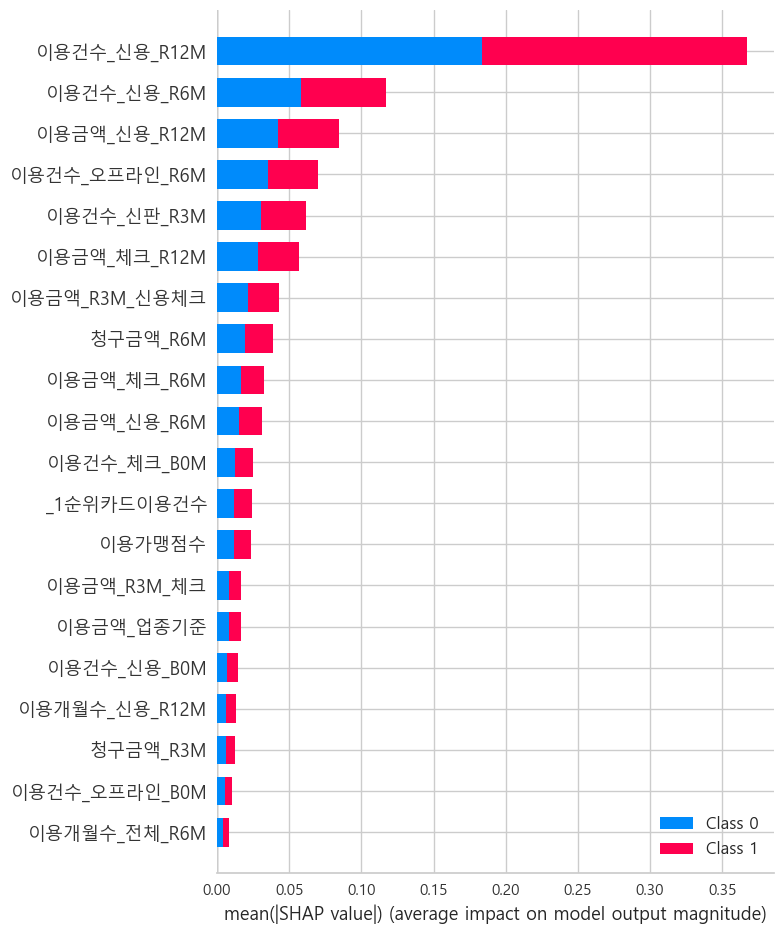

In [71]:
shap.summary_plot(shap_values, X)

In [77]:
shap.summary_plot(shap_values, X, plot_type = "dot")

AssertionError: Only plot_type = 'bar' is supported for multi-output explanations!

In [78]:
# Permutation Importance 계산
perm_importance = permutation_importance(RF_model, X_test, y_test, n_repeats=30, random_state=42)

# 특성 중요도 출력
for i in range(len(X_test.columns)):
    print(f"Feature {X_test.columns[i]} Importance:", perm_importance.importances_mean[i])

Feature 이용건수_신용_R12M Importance: 0.36061328765836265
Feature 이용건수_신용_R6M Importance: 7.805216486346614e-05
Feature _1순위카드이용건수 Importance: 6.504347071908019e-06
Feature 이용건수_신용_B0M Importance: 6.5043470719265235e-06
Feature 이용건수_체크_B0M Importance: 0.001391207568169121
Feature 이용건수_신판_R3M Importance: -2.8908209208748183e-05
Feature 이용건수_오프라인_R6M Importance: 3.6135261510324607e-06
Feature 이용건수_오프라인_B0M Importance: -2.1681156906853496e-06
Feature 이용가맹점수 Importance: -1.0117873223092211e-05
Feature 이용개월수_온라인_R6M Importance: -2.2403862136792057e-05
Feature 이용개월수_오프라인_R6M Importance: -1.9513041215920197e-05
Feature 이용개월수_신용_R12M Importance: 3.6135261510435632e-06
Feature 이용개월수_페이_온라인_R6M Importance: 2.890820920827449e-06
Feature 이용개월수_간편결제_R6M Importance: 4.3362313812522755e-06
Feature 이용개월수_전체_R6M Importance: 5.7816418417215114e-06
Feature 이용개월수_전체_R3M Importance: 7.227052302161141e-06
Feature 상환개월수_R12M Importance: 2.0235746446054895e-05
Feature 이용금액_R3M_신용체크 Importance: 3.3244440589967154e-

In [79]:
# Permutation Importance 계산
perm_importance = permutation_importance(RF_model, X_test, y_test, n_repeats=30, random_state=42)

# 특성 중요도 출력 및 순위 정리
importance_scores = perm_importance.importances_mean
feature_names = X_test.columns
sorted_indices = np.argsort(importance_scores)[::-1]

print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    feature_name = feature_names[idx]
    importance_score = importance_scores[idx]
    print(f"{i + 1}. {feature_name}: {importance_score:.4f}")

Feature Importance Ranking:
1. 이용건수_신용_R12M: 0.3606
2. 이용금액_체크_R12M: 0.0301
3. 이용금액_신용_R12M: 0.0022
4. 이용건수_체크_B0M: 0.0014
5. 이용금액_체크_R6M: 0.0004
6. 이용건수_신용_R6M: 0.0001
7. 이용금액_R3M_신용체크: 0.0000
8. 이용금액_R3M_체크: 0.0000
9. 상환개월수_R12M: 0.0000
10. 이용개월수_전체_R3M: 0.0000
11. 이용건수_신용_B0M: 0.0000
12. _1순위카드이용건수: 0.0000
13. 이용개월수_전체_R6M: 0.0000
14. 이용금액_할부_R12M: 0.0000
15. 청구금액_R3M: 0.0000
16. 이용개월수_간편결제_R6M: 0.0000
17. 이용개월수_신용_R12M: 0.0000
18. 이용건수_오프라인_R6M: 0.0000
19. 이용개월수_페이_온라인_R6M: 0.0000
20. 이용금액_신용_B0M: 0.0000
21. 청구금액_R6M: -0.0000
22. 이용건수_오프라인_B0M: -0.0000
23. 쇼핑_전체_이용금액: -0.0000
24. 이용가맹점수: -0.0000
25. _1순위카드이용금액: -0.0000
26. 카드이용한도금액: -0.0000
27. 이용개월수_오프라인_R6M: -0.0000
28. 이용개월수_온라인_R6M: -0.0000
29. 이용금액_신용_R6M: -0.0000
30. 이용건수_신판_R3M: -0.0000
31. 청구금액_B0: -0.0000
32. 이용금액_업종기준: -0.0001


In [85]:
# X = df3[['이용건수_신용_R12M','이용건수_신용_R6M',
# '_1순위카드이용건수','이용건수_신용_B0M','이용건수_체크_B0M',
# '이용건수_오프라인_R6M',
# '이용개월수_신용_R12M','이용개월수_페이_온라인_R6M',
# '이용개월수_간편결제_R6M','이용개월수_전체_R6M','이용개월수_전체_R3M',
# '상환개월수_R12M','이용금액_R3M_신용체크',
# '이용금액_할부_R12M',
# '이용금액_체크_R12M','이용금액_체크_R6M',
# '이용금액_R3M_체크','이용금액_신용_R12M']]
X = df3[['이용금액_체크_R12M','이용금액_신용_R12M','이용건수_체크_B0M','이용건수_신용_R6M']]
y = df3['고객구분_New']

# '이용건수_신용_R12M',

# '이용금액_업종기준','청구금액_B0','청구금액_R3M','청구금액_R6M','쇼핑_전체_이용금액','이용건수_신판_R3M',
# ,'이용금액_신용_R6M','이용개월수_온라인_R6M','이용개월수_오프라인_R6M','카드이용한도금액','_1순위카드이용금액',
# '이용가맹점수','이용건수_오프라인_B0M','이용금액_신용_B0M',

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9943195368904885
Confusion Matrix:
 [[22264   162]
 [  100 23597]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.99      0.99     22426
          휴면       0.99      1.00      0.99     23697

    accuracy                           0.99     46123
   macro avg       0.99      0.99      0.99     46123
weighted avg       0.99      0.99      0.99     46123



In [81]:
# Permutation Importance 계산
perm_importance = permutation_importance(RF_model, X_test, y_test, n_repeats=30, random_state=42)

# 특성 중요도 출력 및 순위 정리
importance_scores = perm_importance.importances_mean
feature_names = X_test.columns
sorted_indices = np.argsort(importance_scores)[::-1]

print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    feature_name = feature_names[idx]
    importance_score = importance_scores[idx]
    print(f"{i + 1}. {feature_name}: {importance_score:.4f}")

Feature Importance Ranking:
1. 이용건수_신용_R6M: 0.1361
2. 이용금액_신용_R12M: 0.0681
3. 이용금액_체크_R12M: 0.0369
4. 이용건수_오프라인_R6M: 0.0026
5. 이용건수_체크_B0M: 0.0014
6. 이용금액_체크_R6M: 0.0007
7. 이용개월수_신용_R12M: 0.0004
8. 이용금액_신용_R6M: 0.0003
9. 상환개월수_R12M: 0.0003
10. 청구금액_R6M: 0.0003
11. 이용금액_R3M_신용체크: 0.0003
12. 청구금액_R3M: 0.0002
13. 이용금액_R3M_체크: 0.0002
14. 이용금액_업종기준: 0.0001
15. 이용금액_신용_B0M: 0.0001
16. 이용건수_신판_R3M: 0.0001
17. 이용개월수_간편결제_R6M: 0.0001
18. 청구금액_B0: 0.0001
19. 이용금액_할부_R12M: 0.0001
20. 이용건수_신용_B0M: 0.0001
21. 카드이용한도금액: 0.0001
22. _1순위카드이용금액: 0.0001
23. 쇼핑_전체_이용금액: 0.0000
24. 이용개월수_페이_온라인_R6M: 0.0000
25. _1순위카드이용건수: 0.0000
26. 이용가맹점수: 0.0000
27. 이용개월수_온라인_R6M: 0.0000
28. 이용건수_오프라인_B0M: 0.0000
29. 이용개월수_전체_R3M: -0.0000
30. 이용개월수_오프라인_R6M: -0.0000
31. 이용개월수_전체_R6M: -0.0001


# 최최종

In [ ]:
'이용건수_신판_R12M', '이용금액_R3M_신용체크', '_1순위카드이용건수',
'이용건수_신용_B0M', '이용금액_R3M_신용', '청구금액_R3M', '이용건수_신판_B0M',
'_1순위카드이용금액', '이용금액_일시불_B0M', '이용금액_신판_B0M', '이용건수_체크_B0M',
'쇼핑_편의점_이용금액', '이용금액_R3M_체크', '이용금액_신용_B0M',
'유효카드수_신용체크','유효카드수_체크','이용금액_할부_유이자_R12M',
'입회경과개월수_신용','카드이용한도금액','_1순위카드ID','유효카드수_신용',
'납부_기타이용금액','이용금액_할부_B0M','탈회횟수_누적','이용금액_할부_무이자_B0M',
'이용건수_할부_유이자_R3M'

In [87]:
X = df3[['이용건수_신판_R12M', '이용금액_R3M_신용체크', '_1순위카드이용건수',
'이용건수_신용_B0M', '이용금액_R3M_신용', '청구금액_R3M', '이용건수_신판_B0M',
'_1순위카드이용금액', '이용금액_일시불_B0M', '이용금액_신판_B0M', '이용건수_체크_B0M',
'쇼핑_편의점_이용금액', '이용금액_R3M_체크', '이용금액_신용_B0M']]
y = df3['고객구분_New']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


RF_model = RandomForestClassifier(random_state = 42)

RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_valid)


accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.994877771152908
Confusion Matrix:
 [[17613    99]
 [   90 19096]]
Classification Report:
               precision    recall  f1-score   support

          연속       0.99      0.99      0.99     17712
          휴면       0.99      1.00      1.00     19186

    accuracy                           0.99     36898
   macro avg       0.99      0.99      0.99     36898
weighted avg       0.99      0.99      0.99     36898



In [88]:
X = df3[['이용건수_신판_R12M', '이용금액_R3M_신용체크', '_1순위카드이용건수',
'이용건수_신용_B0M', '이용금액_R3M_신용', '청구금액_R3M', '이용건수_신판_B0M',
'_1순위카드이용금액', '이용금액_일시불_B0M', '이용금액_신판_B0M', '이용건수_체크_B0M',
'쇼핑_편의점_이용금액', '이용금액_R3M_체크', '이용금액_신용_B0M']]
y = df3['고객구분_New']


y_pred = RF_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.994666435400993
Confusion Matrix:
 [[22285   141]
 [  105 23592]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.99      0.99     22426
          휴면       0.99      1.00      0.99     23697

    accuracy                           0.99     46123
   macro avg       0.99      0.99      0.99     46123
weighted avg       0.99      0.99      0.99     46123



In [89]:
# Permutation Importance 계산
perm_importance = permutation_importance(RF_model, X_test, y_test, n_repeats=30, random_state=42)

# 특성 중요도 출력 및 순위 정리
importance_scores = perm_importance.importances_mean
feature_names = X_test.columns
sorted_indices = np.argsort(importance_scores)[::-1]

print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    feature_name = feature_names[idx]
    importance_score = importance_scores[idx]
    print(f"{i + 1}. {feature_name}: {importance_score:.4f}")

Feature Importance Ranking:
1. 이용건수_신판_R12M: 0.4236
2. 이용건수_체크_B0M: 0.0411
3. 이용금액_R3M_체크: 0.0045
4. 청구금액_R3M: 0.0044
5. 이용금액_R3M_신용체크: 0.0014
6. 이용금액_신용_B0M: 0.0003
7. 쇼핑_편의점_이용금액: 0.0000
8. 이용금액_신판_B0M: -0.0001
9. 이용건수_신용_B0M: -0.0001
10. 이용건수_신판_B0M: -0.0001
11. _1순위카드이용건수: -0.0001
12. 이용금액_일시불_B0M: -0.0001
13. 이용금액_R3M_신용: -0.0001
14. _1순위카드이용금액: -0.0002


In [113]:
X = df3[['이용건수_신판_R12M', '이용건수_체크_B0M','이용금액_R3M_체크','청구금액_R3M','이용금액_R3M_신용체크','이용금액_신용_B0M',
        '_1순위카드이용금액']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


RF_model = RandomForestClassifier(random_state = 42)

RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_valid)


accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9951758902921568
Confusion Matrix:
 [[17617    95]
 [   83 19103]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.99      0.99     17712
          휴면       1.00      1.00      1.00     19186

    accuracy                           1.00     36898
   macro avg       1.00      1.00      1.00     36898
weighted avg       1.00      1.00      1.00     36898



In [114]:
X = df3[['이용건수_신판_R12M', '이용건수_체크_B0M','이용금액_R3M_체크','청구금액_R3M','이용금액_R3M_신용체크','이용금액_신용_B0M',
        '_1순위카드이용금액']]


y_pred = RF_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9947965223424322
Confusion Matrix:
 [[22288   138]
 [  102 23595]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.99      0.99     22426
          휴면       0.99      1.00      0.99     23697

    accuracy                           0.99     46123
   macro avg       0.99      0.99      0.99     46123
weighted avg       0.99      0.99      0.99     46123



In [97]:
# Shap 값 계산을 위한 TreeExplainer 생성
explainer = shap.TreeExplainer(RF_model,X)

# Shap 값 계산
shap_values = explainer.shap_values(X,approximate=True)

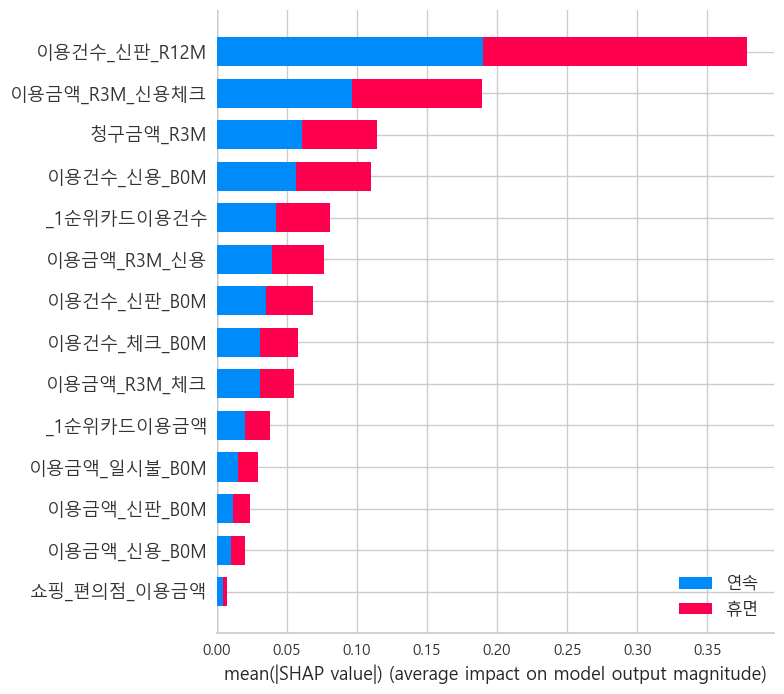

In [101]:
# shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, feature_names=X.columns,class_names= ['휴면','연속'])

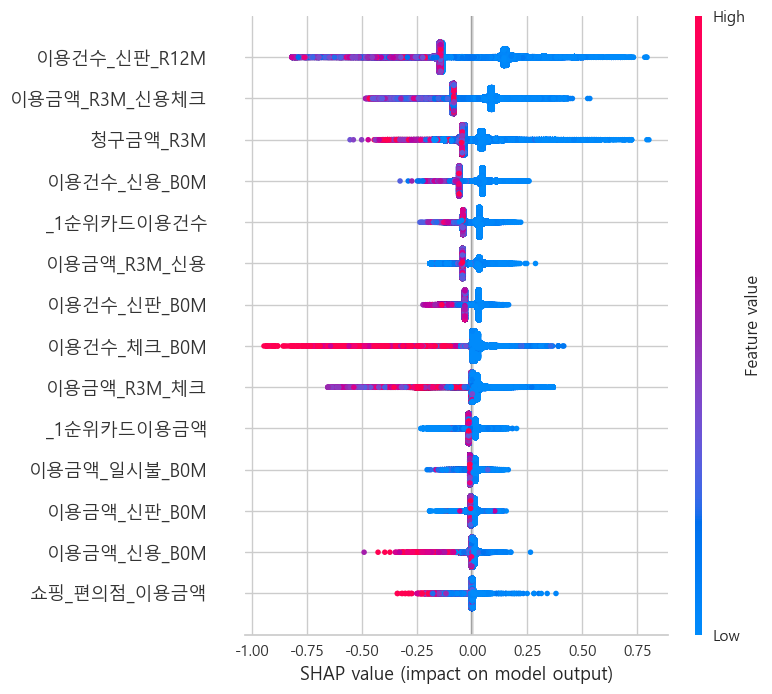

In [103]:
# shap.summary_plot(shap_values, X, plot_type = "dot")
plt.rcParams['axes.unicode_minus'] = False

cmap = 'coolwarm'
shap.summary_plot(shap_values[1], features=X, plot_type='dot')
plt.show()

In [108]:
shap.initjs()
expected_value = explainer.expected_value
shap.force_plot(expected_value[0],shap_values[1][5],X.iloc[20,:])

## automl - classic - 27개

# 찐최종

In [115]:
X = df3[['이용건수_신판_R12M', '이용금액_R3M_신용체크', '_1순위카드이용건수',
'이용건수_신용_B0M', '이용금액_R3M_신용', '청구금액_R3M', '이용건수_신판_B0M',
'_1순위카드이용금액', '이용금액_일시불_B0M', '이용금액_신판_B0M', '이용건수_체크_B0M',
'쇼핑_편의점_이용금액', '이용금액_R3M_체크', '이용금액_신용_B0M',
'유효카드수_신용체크','유효카드수_체크','이용금액_할부_유이자_R12M',
'입회경과개월수_신용','카드이용한도금액','_1순위카드ID','유효카드수_신용',
'납부_기타이용금액','이용금액_할부_B0M','탈회횟수_누적','이용금액_할부_무이자_B0M',
'이용건수_할부_유이자_R3M']]
y = df3['고객구분_New']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


RF_model = RandomForestClassifier(random_state = 42)

RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_valid)


accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9953927042116104
Confusion Matrix:
 [[17620    92]
 [   78 19108]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.99      1.00     17712
          휴면       1.00      1.00      1.00     19186

    accuracy                           1.00     36898
   macro avg       1.00      1.00      1.00     36898
weighted avg       1.00      1.00      1.00     36898



In [116]:
X = df3[['이용건수_신판_R12M', '이용금액_R3M_신용체크', '_1순위카드이용건수',
'이용건수_신용_B0M', '이용금액_R3M_신용', '청구금액_R3M', '이용건수_신판_B0M',
'_1순위카드이용금액', '이용금액_일시불_B0M', '이용금액_신판_B0M', '이용건수_체크_B0M',
'쇼핑_편의점_이용금액', '이용금액_R3M_체크', '이용금액_신용_B0M',
'유효카드수_신용체크','유효카드수_체크','이용금액_할부_유이자_R12M',
'입회경과개월수_신용','카드이용한도금액','_1순위카드ID','유효카드수_신용',
'납부_기타이용금액','이용금액_할부_B0M','탈회횟수_누적','이용금액_할부_무이자_B0M',
'이용건수_할부_유이자_R3M']]
y = df3['고객구분_New']


y_pred = RF_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9948832469700584
Confusion Matrix:
 [[22286   140]
 [   96 23601]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.99      0.99     22426
          휴면       0.99      1.00      1.00     23697

    accuracy                           0.99     46123
   macro avg       0.99      0.99      0.99     46123
weighted avg       0.99      0.99      0.99     46123



In [117]:
# Permutation Importance 계산
perm_importance = permutation_importance(RF_model, X_test, y_test, n_repeats=30, random_state=42)

# 특성 중요도 출력 및 순위 정리
importance_scores = perm_importance.importances_mean
feature_names = X_test.columns
sorted_indices = np.argsort(importance_scores)[::-1]

print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    feature_name = feature_names[idx]
    importance_score = importance_scores[idx]
    print(f"{i + 1}. {feature_name}: {importance_score:.4f}")

Feature Importance Ranking:
1. 이용건수_신판_R12M: 0.4189
2. 이용건수_체크_B0M: 0.0354
3. 청구금액_R3M: 0.0041
4. 이용금액_R3M_체크: 0.0041
5. 이용금액_R3M_신용체크: 0.0010
6. 이용금액_신용_B0M: 0.0001
7. 카드이용한도금액: 0.0001
8. 유효카드수_신용체크: 0.0001
9. 이용금액_신판_B0M: 0.0001
10. 이용금액_R3M_신용: 0.0001
11. _1순위카드이용건수: 0.0001
12. 쇼핑_편의점_이용금액: 0.0000
13. 유효카드수_신용: 0.0000
14. 탈회횟수_누적: 0.0000
15. 이용건수_신판_B0M: 0.0000
16. 이용금액_할부_B0M: 0.0000
17. 이용금액_할부_유이자_R12M: 0.0000
18. 이용건수_할부_유이자_R3M: 0.0000
19. _1순위카드이용금액: 0.0000
20. 이용금액_할부_무이자_B0M: 0.0000
21. 유효카드수_체크: 0.0000
22. 이용건수_신용_B0M: 0.0000
23. 납부_기타이용금액: 0.0000
24. 입회경과개월수_신용: -0.0000
25. _1순위카드ID: -0.0000
26. 이용금액_일시불_B0M: -0.0001


In [ ]:
'이용건수_신판_R12M', '이용건수_체크_B0M', '청구금액_R3M','이용금액_R3M_체크',
'이용금액_R3M_신용체크','이용금액_신용_B0M','카드이용한도금액',
'유효카드수_신용체크','이용금액_신판_B0M','이용금액_R3M_신용',
'_1순위카드이용건수'

In [ ]:
# '이용금액_신용_B0M','유효카드수_신용체크','이용금액_신판_B0M','이용금액_R3M_신용','_1순위카드이용건수'

In [143]:
X = df3[['이용건수_신판_R12M', '이용건수_체크_B0M', '청구금액_R3M','이용금액_R3M_체크',
'이용금액_R3M_신용체크','카드이용한도금액']]
y = df3['고객구분_New']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


RF_model = RandomForestClassifier(random_state = 42)

RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_valid)


accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9950674833324299
Confusion Matrix:
 [[17612   100]
 [   82 19104]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.99      0.99     17712
          휴면       0.99      1.00      1.00     19186

    accuracy                           1.00     36898
   macro avg       1.00      1.00      1.00     36898
weighted avg       1.00      1.00      1.00     36898



In [144]:
X = df3[['이용건수_신판_R12M', '이용건수_체크_B0M', '청구금액_R3M','이용금액_R3M_체크',
'이용금액_R3M_신용체크','카드이용한도금액']]


y_pred = RF_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9947965223424322
Confusion Matrix:
 [[22284   142]
 [   98 23599]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.99      0.99     22426
          휴면       0.99      1.00      0.99     23697

    accuracy                           0.99     46123
   macro avg       0.99      0.99      0.99     46123
weighted avg       0.99      0.99      0.99     46123



In [160]:
# Shap 값 계산을 위한 TreeExplainer 생성
explainer = shap.TreeExplainer(RF_model,X)

# Shap 값 계산
shap_values = explainer.shap_values(X,approximate=True)

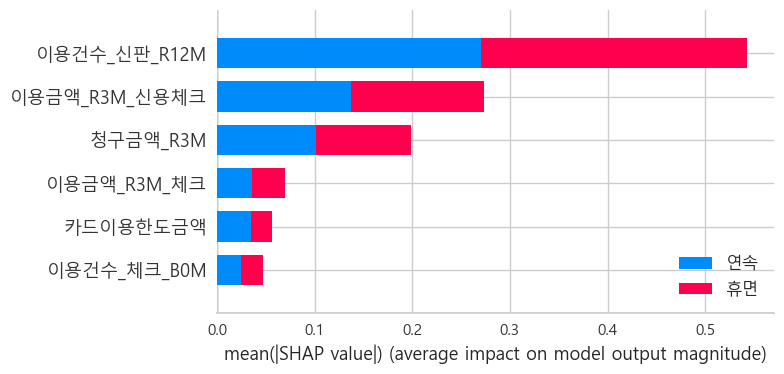

In [161]:
shap.summary_plot(shap_values, feature_names=X.columns,class_names= ['휴면','연속'])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


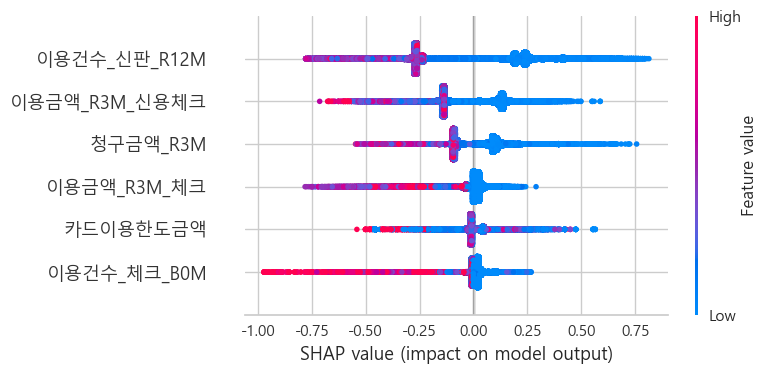

In [163]:
import matplotlib.pyplot as plt
shap.initjs()

# SHAP 도트 플롯 생성
shap.summary_plot(shap_values[1], features=X, plot_type='dot')
plt.show()

In [147]:
# k=5로 k-fold cross validation 수행
scores = cross_val_score(RF_model, X, y, cv=5)
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.99440626 0.99509995 0.99566367 0.99488314 0.99509995]


In [148]:
# K-Fold 교차 검증을 위한 K 값 설정
k = 5  # 5개의 폴드로 나누어 검증

# K-Fold 교차 검증 수행
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# K-Fold 교차 검증 결과를 담을 리스트
results = []

k_num =0

# K번의 학습과 검증을 반복
for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    k_num += 1

    # 모델 학습
    RF_model.fit(X_train, y_train)

    # 모델 평가 (여기서는 accuracy를 평가 지표로 사용)
    score = RF_model.score(X_test, y_test)

    # 결과 저장
    results.append(score)

    # K-Fold 교차 검증 결과 출력
    print(f"{k_num}번째 K-Fold 결과:", results[-1])\

# K-Fold 교차 검증 결과 평균 출력
print("Average Accuracy:", sum(results) / k)

1번째 K-Fold 결과: 0.9947965223424322
2번째 K-Fold 결과: 0.9953167685703135
3번째 K-Fold 결과: 0.9948397727765491
4번째 K-Fold 결과: 0.9950349074194528
5번째 K-Fold 결과: 0.9955119032132171
Average Accuracy: 0.995099974864393


In [154]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [155]:
df4 = df4[['이용건수_신판_R12M', '이용건수_체크_B0M', '청구금액_R3M','이용금액_R3M_체크',
'이용금액_R3M_신용체크','카드이용한도금액','고객구분_New']]

In [156]:
X1 = df4[['이용건수_신판_R12M', '이용건수_체크_B0M', '청구금액_R3M','이용금액_R3M_체크',
'이용금액_R3M_신용체크','카드이용한도금액']]

In [157]:
df4['prediction'] = RF_model.predict(X1)

In [158]:
df4['prediction'].value_counts()

연속    43295
휴면    26094
Name: prediction, dtype: int64